Import public packages and functions

In [1]:
import os
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import statistics as stat
import json
from scipy.stats import kstest

In [2]:
def get_repo_path_in_notebook():
    """
    Finds path of repo from Notebook.
    Start running this once to correctly find
    other modules/functions
    """
    path = os.getcwd()
    repo_name = 'ultraleap_analysis'

    while path[-len(repo_name):] != 'ultraleap_analysis':

        path = os.path.dirname(path)

    return path

In [3]:
repo_path = get_repo_path_in_notebook()
code_path = os.path.join(repo_path, 'code')
os.chdir(code_path)

Import own functions

In [4]:
import sig_processing.extract_scores as sc_ext
import sig_processing.predict as pred
import plotting.boxplotting as bxplt

### Cohort Specifications

In [37]:
folder  = 'control'

ft = 'ft'
feat_df_path_ft = os.path.join(
    repo_path,
    'EDA',
    folder,
    ft, 
    'new_features.csv'
    )

X_df_ft = pd.read_csv(feat_df_path_ft, index_col=0)


oc = 'oc'
feat_df_path_oc = os.path.join(
    repo_path,
    'EDA',
    folder,
    oc, 
    'new_features.csv'
    )

X_df_oc = pd.read_csv(feat_df_path_oc, index_col=0)


ps = 'ps'
feat_df_path_ps = os.path.join(
    repo_path,
    'EDA',
    folder,
    ps, 
    'new_features.csv'
    )

X_df_ps = pd.read_csv(feat_df_path_ps, index_col=0)

In [38]:
df_tasks = pd.concat([X_df_ft,X_df_oc,X_df_ps])
df_tasks = df_tasks.reset_index(drop=True)
df_tasks

,file,num_events,mean_max_dist,sd_max_dist,coef_var_max_dist,slope_max_dist,decr_max_dist,mean_max_vel,sd_max_vel,coef_var_max_vel,...,mean_tap_dur,sd_tap_dur,coef_var_tap_dur,slope_tap_dur,mean_rms,sd_rms,slope_rms,sum_rms,jerkiness,entropy
0,b1_control001_m0_vr_ft_right.json,24.0,0.117761,0.007544,0.064065,-0.000664,-0.185735,1.960155,0.323416,0.164995,...,0.470056,0.200349,0.426223,0.000533,0.054330,0.005162,-0.000239,1.249590,6.184543,6.519147
1,b2_control001_m0_vr_ft_right.json,28.0,0.111317,0.004117,0.036983,-0.000218,-0.137997,2.467647,0.585288,0.237185,...,0.393440,0.151688,0.385542,0.004185,0.055711,0.004798,-0.000041,1.504197,8.214953,6.753438
2,b1_control001_m0_dt_ft_right.json,19.0,0.106570,0.007279,0.068303,-0.000986,-0.165012,1.529153,0.234664,0.153460,...,0.615110,0.254656,0.414001,0.005128,0.055213,0.005375,0.000008,0.993828,8.907881,6.458338
3,b2_control001_m0_dt_ft_right.json,26.0,0.111947,0.006547,0.058482,-0.000811,-0.177505,2.632114,0.444506,0.168878,...,0.415245,0.131324,0.316257,0.006793,0.054676,0.004332,-0.000365,1.366908,14.180783,6.738152
4,b1_control001_m0_st_ft_right.json,27.0,0.082891,0.004774,0.057593,-0.000555,-0.135484,0.707252,0.183831,0.259922,...,0.443324,0.102314,0.230789,-0.001171,0.061339,0.002529,-0.000162,1.594813,9.052591,6.575933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,b2_control005_m0_vr_ps_left.json,12.0,175.047148,3.083427,0.017615,0.250481,0.016622,1432.989322,364.544355,0.254394,...,0.979918,0.026910,0.027461,0.002702,92.481341,4.612117,0.486194,1017.294753,4.405514,6.683361
164,b1_control005_m0_dt_ps_left.json,12.0,161.238476,2.145842,0.013308,-0.395037,-0.035614,1278.315177,132.543250,0.103686,...,0.960624,0.105444,0.109766,-0.002246,97.624505,6.456735,0.012825,1073.869559,6.888009,6.756932
165,b2_control005_m0_dt_ps_left.json,10.0,161.905719,3.493065,0.021575,-0.445704,-0.005969,1124.201065,249.984500,0.222366,...,1.216488,0.038352,0.031527,0.006974,89.534883,3.179850,0.733324,805.813948,5.695888,6.573680
166,b1_control005_m0_st_ps_left.json,10.0,149.584972,4.845846,0.032395,1.219729,0.138639,1072.742467,205.082225,0.191176,...,1.169591,0.066866,0.057171,0.016708,89.327059,2.970179,0.106182,803.943532,4.886123,6.682109


In [47]:
cam = [file.split('_')[3] for file in df_tasks['file']]
task = [file.split('_')[4] for file in df_tasks['file']]

In [48]:
df_tasks['camera'] = cam
df_tasks['task'] = task

In [46]:
col_ft = ['Finger Tapping' for i in np.arange(0,X_df_ft.shape[0])]
df_ft = pd.DataFrame({
    'cam': cam,
    'task':task
})
df_ft

,cam,task
0,vr,ft
1,vr,ft
2,dt,ft
3,dt,ft
4,st,ft
...,...,...
163,vr,ps
164,dt,ps
165,dt,ps
166,st,ps


Opening and Closing

In [41]:
cond_oc = [file.split('_')[2] for file in X_df_oc['file']]

In [45]:
col_oc = ['Opening Closing' for i in np.arange(0,X_df_oc.shape)]
df_oc = pd.DataFrame({
    'task': col_oc,
    'cond':cond_oc
})
df_oc

TypeError: arange: scalar arguments expected instead of a tuple.

Pronation Supination

In [62]:
cond_ps = [file.split('_')[2] for file in X_df_ps['file']]

In [63]:
col_ps = ['Pronation Supination' for i in np.arange(0,len(y_ps))]
df_ps = pd.DataFrame({
    'task': col_ps,
    'cond':cond_ps
})
df_ps

,task,cond
0,Pronation Supination,m1
1,Pronation Supination,m1
2,Pronation Supination,m1
3,Pronation Supination,m1
4,Pronation Supination,m1
...,...,...
171,Pronation Supination,m1s0
172,Pronation Supination,m1s1
173,Pronation Supination,m1s1
174,Pronation Supination,m0s1


In [24]:
df_tasks = pd.concat([df_ft,df_oc,df_ps])
df_tasks

,task,score
0,Finger Tapping,m1
1,Finger Tapping,m1
2,Finger Tapping,m1
3,Finger Tapping,m1
4,Finger Tapping,m1
...,...,...
171,Pronation Supination,m1s0
172,Pronation Supination,m1s1
173,Pronation Supination,m1s1
174,Pronation Supination,m0s1


In [50]:
pivot_table = df_tasks[['task','camera']].pivot_table(index='task', columns='camera', 
                                              aggfunc=len, fill_value=0)
print(pivot_table)

camera  dt  st  vr
task              
ft      18  18  18
oc      20  20  20
ps      18  20  16


In [51]:
from tabulate import tabulate

In [52]:
# print(tabulate(pivot_table, headers='keys',tablefmt='latex'))
print(tabulate(pivot_table, headers='keys',tablefmt='pretty'))

+------+----+----+----+
| task | dt | st | vr |
+------+----+----+----+
|  ft  | 18 | 18 | 18 |
|  oc  | 20 | 20 | 20 |
|  ps  | 18 | 20 | 16 |
+------+----+----+----+


([<matplotlib.axis.YTick at 0x268d5618460>,
 [Text(0, 0, '0'),
  Text(0, 20, '20'),
  Text(0, 40, '40'),
  Text(0, 60, '60'),
  Text(0, 80, '80'),
  Text(0, 100, '100')])

<Figure size 1500x2200 with 0 Axes>

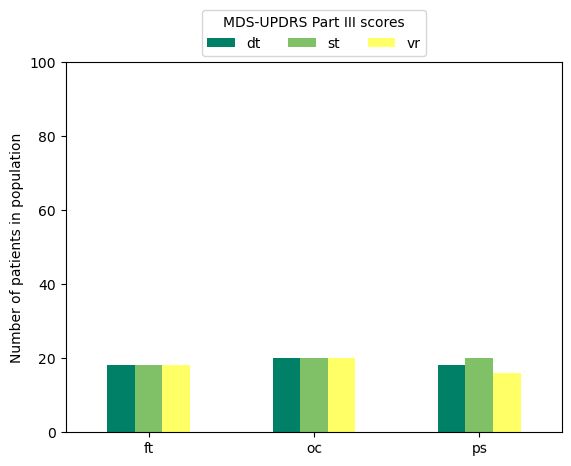

In [53]:
fig = plt.figure(figsize=(15,22))
pivot_table.plot.bar(colormap='summer', rot=1)
plt.ylabel('Number of patients in population')
plt.xlabel('')
plt.legend(title='MDS-UPDRS Part III scores', bbox_to_anchor=(0.5, 1.08), loc='center', ncol=len(pivot_table.columns))
plt.yticks([0,20,40,60,80,100])

In [29]:
X_df_ft

,file,num_events,mean_max_dist,sd_max_dist,coef_var_max_dist,slope_max_dist,decr_max_dist,mean_max_vel,sd_max_vel,coef_var_max_vel,...,mean_tap_dur,sd_tap_dur,coef_var_tap_dur,slope_tap_dur,mean_rms,sd_rms,slope_rms,sum_rms,jerkiness,entropy
0,b1_ul001_m1_vr_ft_right.json,26.0,0.139824,0.006147,0.043961,-0.000597,0.004762,2.756138,0.472769,0.171533,...,0.418023,0.146259,0.349883,0.002214,0.070272,0.007038,-0.000641,1.756795,10.092632,6.683361
1,b2_ul001_m1_vr_ft_right.json,31.0,0.134933,0.004083,0.030256,0.000072,-0.021412,2.559501,0.425132,0.166100,...,0.360868,0.031789,0.088091,-0.000501,0.077272,0.004883,-0.000028,2.318146,7.849825,6.683361
2,b1_ul001_m1_dt_ft_right.json,20.0,0.086324,0.019164,0.222004,-0.001298,-0.319352,1.531217,0.322006,0.210294,...,0.487451,0.093077,0.190946,-0.000302,0.050991,0.006480,-0.000532,0.968823,11.774737,6.683361
3,b2_ul001_m1_dt_ft_right.json,26.0,0.086305,0.016929,0.196150,-0.001409,-0.185258,1.894720,0.857292,0.452464,...,0.437970,0.093196,0.212792,0.007941,0.050254,0.007442,-0.000370,1.256361,11.029105,6.673298
4,b3_ul001_m1_dt_ft_right.json,24.0,0.100558,0.010255,0.101979,-0.000742,-0.153763,2.345756,0.899337,0.383389,...,0.427845,0.082475,0.192769,-0.001855,0.059499,0.004799,-0.000181,1.368483,10.973734,6.681626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,b3_ul019_m0s0_dt_ft_left.json,9.0,0.044480,0.009061,0.203708,-0.000566,-0.355184,0.397632,0.133423,0.335544,...,0.445870,0.098635,0.221220,0.009685,0.027596,0.005413,0.001308,0.220768,6.500339,6.643790
196,b1_ul019_m1s0_vr_ft_left.json,4.0,0.023934,0.003339,0.139512,-0.003846,-0.316802,0.347057,0.071135,0.204966,...,1.014140,0.327512,0.322946,0.312935,0.010331,0.001545,-0.001780,0.030993,9.305886,6.572608
197,b3_ul019_m1s0_vr_ft_left.json,22.0,0.025543,0.006056,0.237108,-0.000138,-0.419691,0.345630,0.097573,0.282306,...,0.467687,0.123651,0.264387,-0.000102,0.012507,0.002469,0.000046,0.262650,6.648331,6.682109
198,b2_ul019_m1s1_vr_ft_left.json,4.0,0.020624,0.000347,0.016828,-0.000240,0.286117,0.318934,0.032386,0.101545,...,2.088555,2.056497,0.984651,2.185150,0.008887,0.000092,0.000028,0.026662,7.048833,6.678634


In [30]:
ls_feats_ft = ['num_events','mean_max_dist','mean_max_vel','sum_rms']

In [51]:
# Store test statistic and p-values
statistics = []
p_values = []

for column in ls_feats_ft:
        # standardize the data (to have mean 0, std. dev. 1) before applying the test
        standardized_data = (X_df_ft[column] - X_df_ft[column].mean()) / X_df_ft[column].std()
        stat, p_value = kstest(standardized_data, 'norm')
        statistics.append(stat)
        p_values.append(p_value)

# Create a DataFrame for easy visualization
normality_df = pd.DataFrame({
    'Feature': ls_feats_ft,
    'Statistic': statistics,
    'P-Value': p_values
})

normality_df = normality_df.sort_values(by='Statistic', ascending=False)
normality_df


,Feature,Statistic,P-Value
0,num_events,0.106678,0.019511
3,sum_rms,0.083205,0.118481
1,mean_max_dist,0.065766,0.337791
2,mean_max_vel,0.050212,0.675202


In [47]:
# Store test statistic and p-values
statistics = []
p_values = []

for column in X_df_ft.iloc[:,1:].columns:
        # standardize the data (to have mean 0, std. dev. 1) before applying the test
        standardized_data = (X_df_ft.iloc[:,1:][column] - X_df_ft.iloc[:,1:][column].mean()) / X_df_ft.iloc[:,1:][column].std()
        stat, p_value = kstest(standardized_data, 'norm')
        statistics.append(stat)
        p_values.append(p_value)

# Create a DataFrame for easy visualization
normality_df = pd.DataFrame({
    'Feature': X_df_ft.iloc[:,1:].columns,
    'Statistic': statistics,
    'P-Value': p_values
})

normality_df = normality_df.sort_values(by='Statistic', ascending=False)
normality_df


,Feature,Statistic,P-Value
17,slope_tap_dur,0.419238,2.278293e-32
15,sd_tap_dur,0.303238,8.166144e-17
14,mean_tap_dur,0.287749,3.728646e-15
4,slope_max_dist,0.237048,2.265882e-10
20,slope_rms,0.215192,1.311316e-08
16,coef_var_tap_dur,0.171941,1.220671e-05
5,decr_max_dist,0.165017,3.152966e-05
23,entropy,0.160971,5.389258e-05
12,coef_var_mean_vel,0.111822,1.237908e-02
0,num_events,0.106678,1.951080e-02


In [80]:
ls_grouped_condition = []
count_a = 0
count_b = 0
count_c = 0
for cond in df_ft['cond']:
    if cond in ['m1','m1s1']:
        ls_grouped_condition.append('Treated')
        count_a+=1
    elif cond in ['m1s0','m0s1']:
        ls_grouped_condition.append('Partly treated')
        count_b+=1
    elif cond == 'm0s0':
        ls_grouped_condition.append('Untreated')
        count_c+=1
ls_grouped_condition

['Treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Partly treated',
 'Partly treated',
 'Partly treated',
 'Partly treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Partly treated',
 'Partly treated',
 'Partly treated',
 'Partly treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Partly treated',
 'Partly treated',
 'Partly treated',
 'Partly treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Partly treated',
 'Partly treated',
 'Partly treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Treated',
 'Untreated',
 'Untreated',
 'Untreated',
 'Partly treated',
 'Partly treated',
 'Partly treated',
 'Treated',
 'Treated',
 'Treated',
 'Partly treated',
 'Partly treated',
 'Partly treated',
 'Untreated',
 'Unt

In [81]:
count_a,count_b,count_c

(105, 71, 24)

In [116]:
s = 'ul001' 
int(s[-2:])>9

False

In [119]:
X_df_ft['file'].to_list()

['b1_ul001_m1_vr_ft_right.json',
 'b2_ul001_m1_vr_ft_right.json',
 'b1_ul001_m1_dt_ft_right.json',
 'b2_ul001_m1_dt_ft_right.json',
 'b3_ul001_m1_dt_ft_right.json',
 'b1_ul001_m1_vr_ft_left.json',
 'b2_ul001_m1_vr_ft_left.json',
 'b1_ul001_m1_dt_ft_left.json',
 'b2_ul001_m1_dt_ft_left.json',
 'b3_ul001_m1_dt_ft_left.json',
 'b1_ul002_m1_vr_ft_right.json',
 'b2_ul002_m1_vr_ft_right.json',
 'b1_ul002_m1_dt_ft_right.json',
 'b2_ul002_m1_dt_ft_right.json',
 'b1_ul002_m1_vr_ft_left.json',
 'b2_ul002_m1_vr_ft_left.json',
 'b1_ul002_m1_dt_ft_left.json',
 'b2_ul002_m1_dt_ft_left.json',
 'b1_ul003_m1s0_vr_ft_right.json',
 'b2_ul003_m1s0_vr_ft_right.json',
 'b1_ul003_m1s0_dt_ft_right.json',
 'b2_ul003_m1s0_dt_ft_right.json',
 'b1_ul003_m1s1_vr_ft_right.json',
 'b2_ul003_m1s1_vr_ft_right.json',
 'b1_ul003_m1s1_dt_ft_right.json',
 'b2_ul003_m1s1_dt_ft_right.json',
 'b1_ul003_m1s0_vr_ft_left.json',
 'b2_ul003_m1s0_vr_ft_left.json',
 'b1_ul003_m1s0_dt_ft_left.json',
 'b2_ul003_m1s0_dt_ft_left.json',

In [122]:
subs = [sub.split('_')[1] for sub in X_df_ft['file']]
for sub in subs:
    if int(sub[-2:])>9:
        ls_subs.append(sub[-2:])
    else:
        ls_subs.append(sub[-1:])
ls_subs

['1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '10',
 '10',
 '10',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '14',
 '14',
 '14',
 '14',
 '15',
 '15',
 '15',
 '15',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '17',


In [127]:
# Create a sample dataset (replace this with your actual data)
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
data = {
    'num_events': X_df_ft['num_events'],
    'sum_rms': X_df_ft['sum_rms'],
    'mean_max_dist': X_df_ft['mean_max_dist'],
    'mean_max_vel': X_df_ft['mean_max_vel'],
    'subject': ls_subs,
    'condition': ls_grouped_condition
}

df = pd.DataFrame(data)

# List of continuous features
continuous_features = ['num_events', 'sum_rms', 'mean_max_dist', 'mean_max_vel']

# Perform Two-Way ANOVA for each continuous feature
for feature in continuous_features:
    formula = f'{feature} ~ C(subject) + C(condition) + C(subject):C(condition)'
    model = ols(formula, data=df).fit()
    anova_table = anova_lm(model)
    
    print(f"ANOVA results for {feature}:\n")
    print(anova_table)
    print("\n" + "="*40 + "\n")

ANOVA results for num_events:

                            df       sum_sq     mean_sq          F  \
C(subject)                17.0  5445.677071  320.333945  14.888909   
C(condition)               2.0   216.980566  108.490283   5.042556   
C(subject):C(condition)   34.0  1714.472540   50.425663   2.343751   
Residual                 170.0  3657.539286   21.514937        NaN   

                               PR(>F)  
C(subject)               1.490501e-25  
C(condition)             7.456659e-03  
C(subject):C(condition)  1.927756e-04  
Residual                          NaN  


ANOVA results for sum_rms:

                            df     sum_sq   mean_sq          F        PR(>F)
C(subject)                17.0  33.398725  1.964631  31.587274  9.683536e-44
C(condition)               2.0   1.104201  0.552100   8.876654  2.153836e-04
C(subject):C(condition)   34.0   5.739226  0.168801   2.713973  1.298793e-05
Residual                 170.0  10.573475  0.062197        NaN           NaN


A

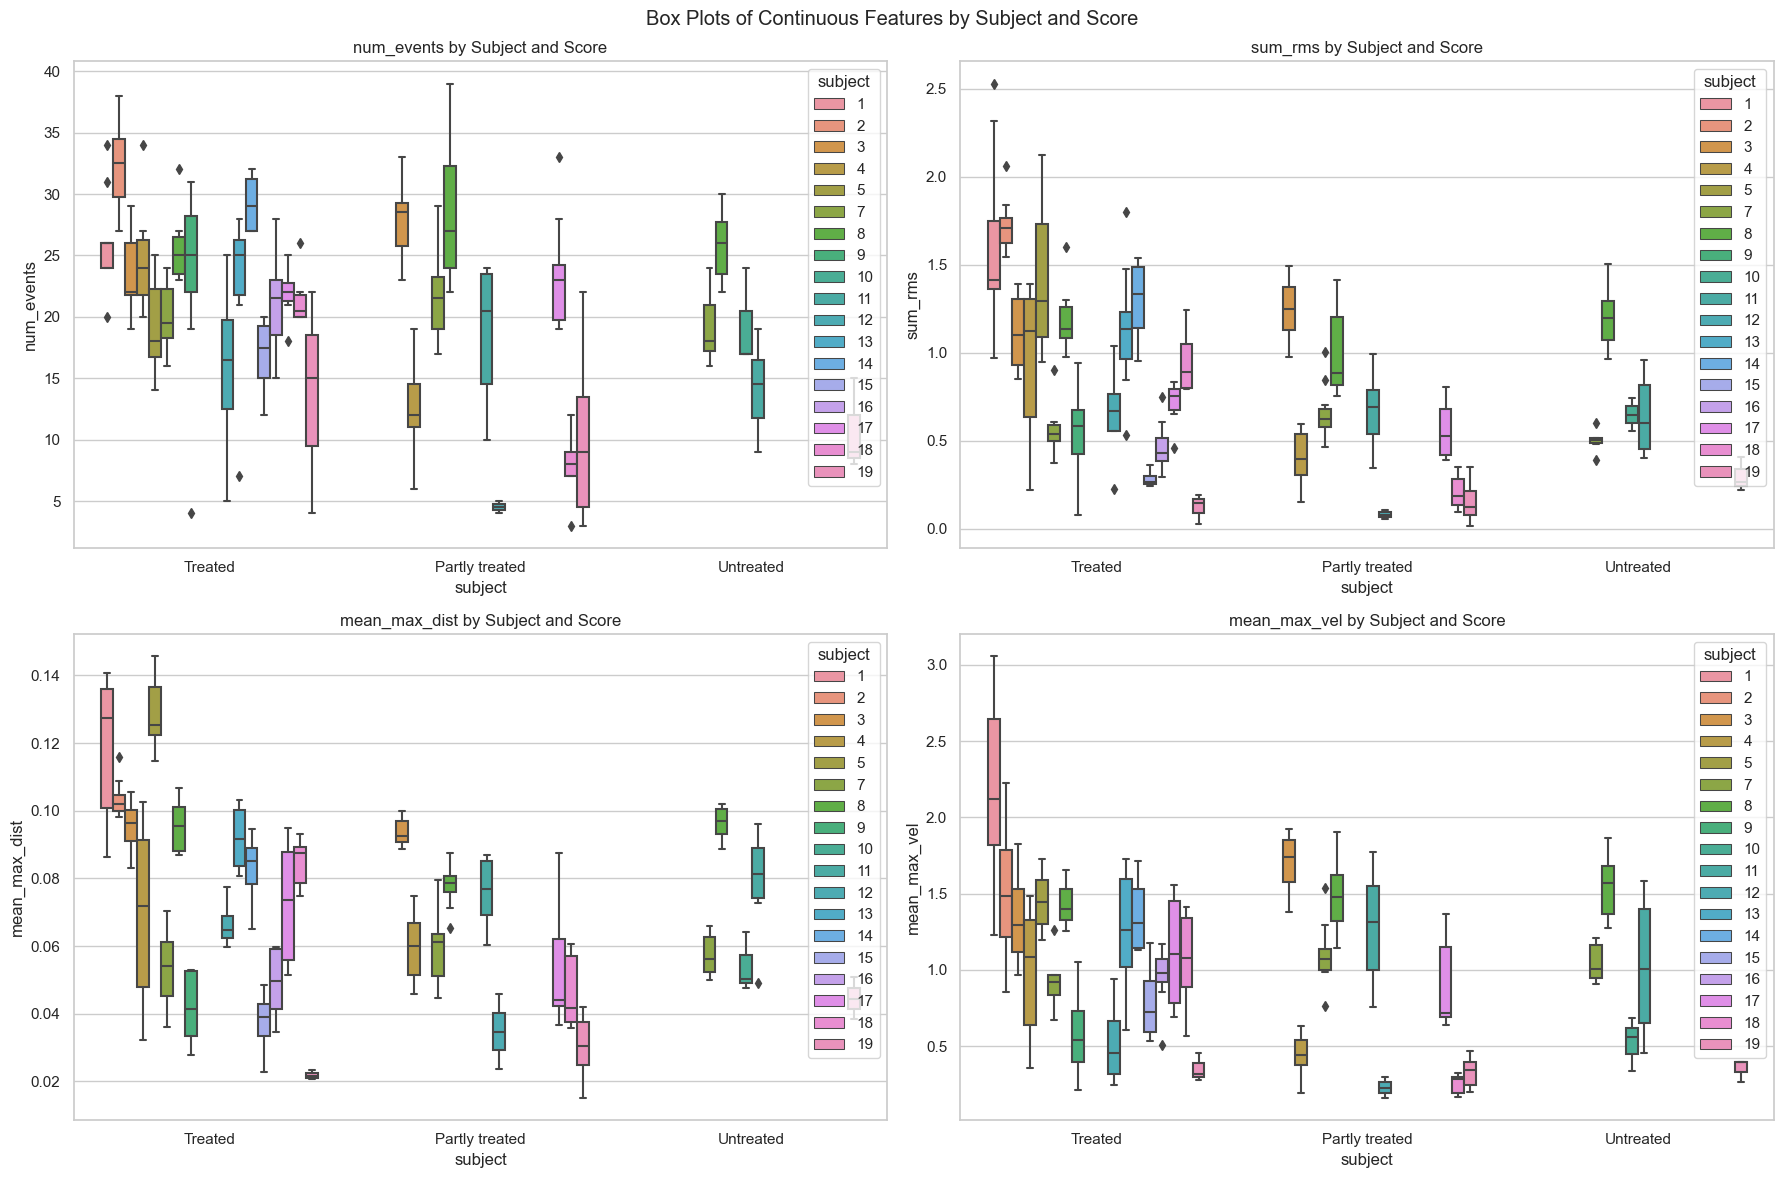

In [141]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Box Plots of Continuous Features by Subject and Score')
# Create box plots for each continuous feature
for i, feature in enumerate(continuous_features):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    sns.boxplot(data=df, x='condition', y=feature, hue='subject', ax=ax, )
    ax.set_title(f'{feature} by Subject and Score')
    ax.set_xlabel('subject')
    ax.set_ylabel(feature)
    ax.legend(title='subject')

plt.tight_layout()
plt.show()

In [87]:
# Create a sample dataset (replace this with your actual data)
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
data = {
    'num_events': X_df_ft['num_events'],
    'sum_rms': X_df_ft['sum_rms'],
    'mean_max_dist': X_df_ft['mean_max_dist'],
    'mean_max_vel': X_df_ft['mean_max_vel'],
    'condition': ls_grouped_condition,
    'score': y_ft
}

df = pd.DataFrame(data)

# List of continuous features
continuous_features = ['num_events', 'sum_rms', 'mean_max_dist', 'mean_max_vel']

# Perform Two-Way ANOVA for each continuous feature
for feature in continuous_features:
    formula = f'{feature} ~ C(condition) + C(score) + C(condition):C(score)'
    model = ols(formula, data=df).fit()
    anova_table = anova_lm(model)
    
    print(f"ANOVA results for {feature}:\n")
    print(anova_table)
    print("\n" + "="*40 + "\n")

ANOVA results for num_events:

                          df       sum_sq     mean_sq          F        PR(>F)
C(condition)             2.0   587.123303  293.561652   7.565979  6.923399e-04
C(score)                 4.0  1911.777365  477.944341  12.318083  6.528445e-09
C(condition):C(score)    8.0   996.774356  124.596795   3.211239  1.923820e-03
Residual               187.0  7255.641294   38.800221        NaN           NaN


ANOVA results for sum_rms:

                          df     sum_sq   mean_sq          F        PR(>F)
C(condition)             2.0   5.945028  2.972514  17.676390  9.304870e-08
C(score)                 4.0   8.664708  2.166177  12.881416  2.779356e-09
C(condition):C(score)    8.0   2.194672  0.274334   1.631358  1.183410e-01
Residual               187.0  31.446473  0.168163        NaN           NaN


ANOVA results for mean_max_dist:

                          df    sum_sq   mean_sq          F        PR(>F)
C(condition)             2.0  0.014462  0.007231  13.871117

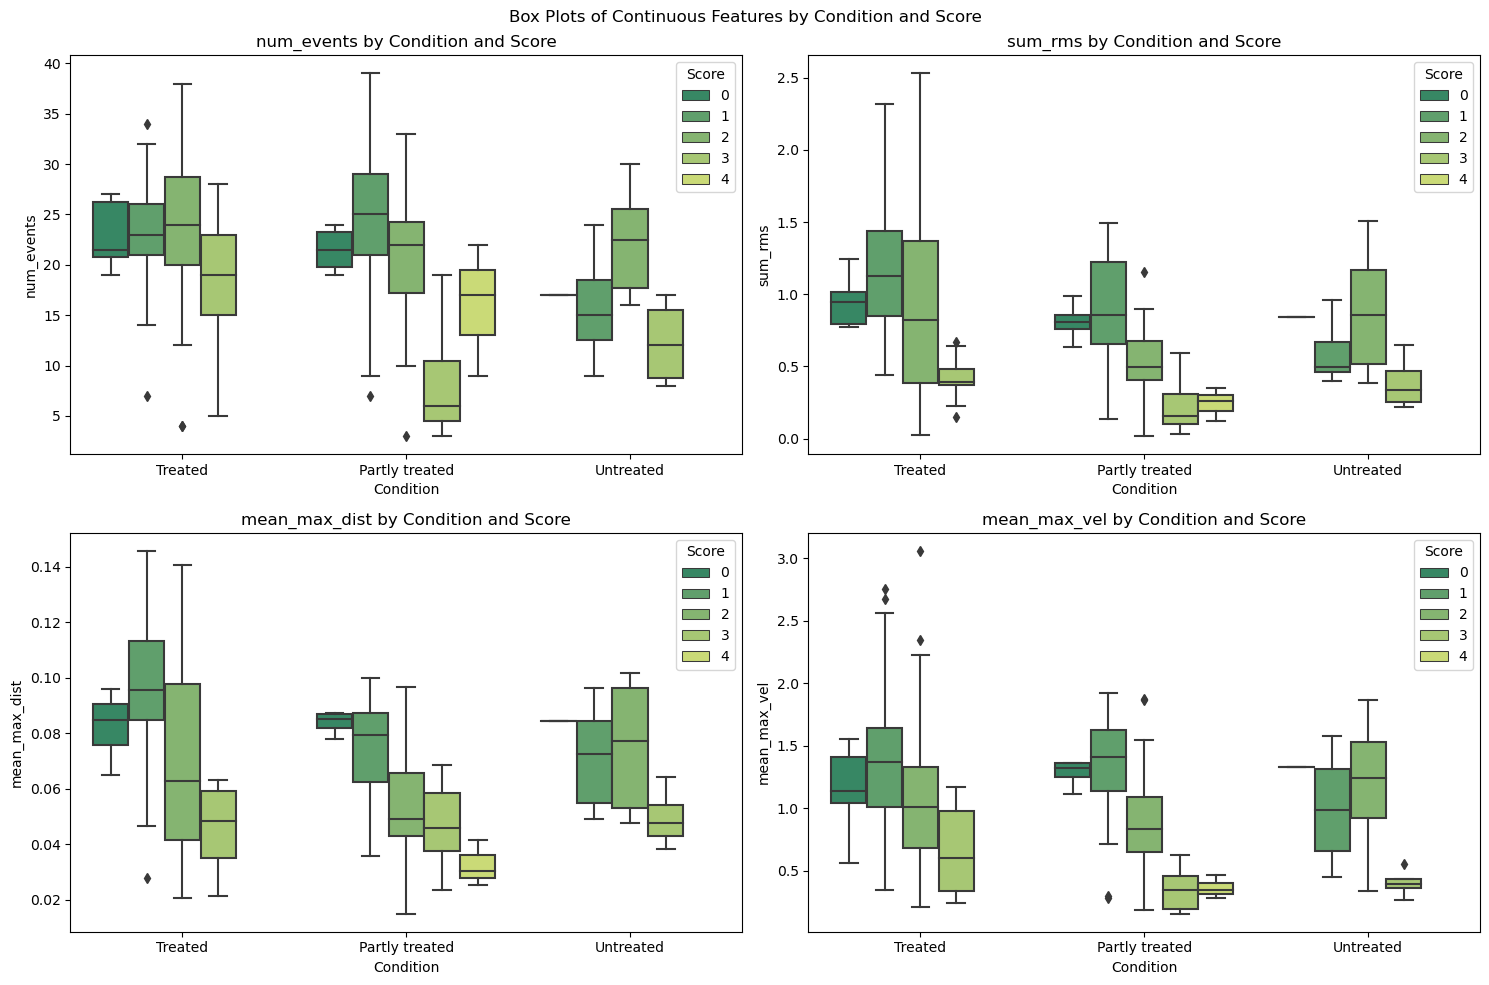

In [91]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Box Plots of Continuous Features by Condition and Score')
# Create box plots for each continuous feature
for i, feature in enumerate(continuous_features):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    sns.boxplot(data=df, x='condition', y=feature, hue='score', ax=ax, palette='summer')
    ax.set_title(f'{feature} by Condition and Score')
    ax.set_xlabel('Condition')
    ax.set_ylabel(feature)
    ax.legend(title='Score')

plt.tight_layout()
plt.show()

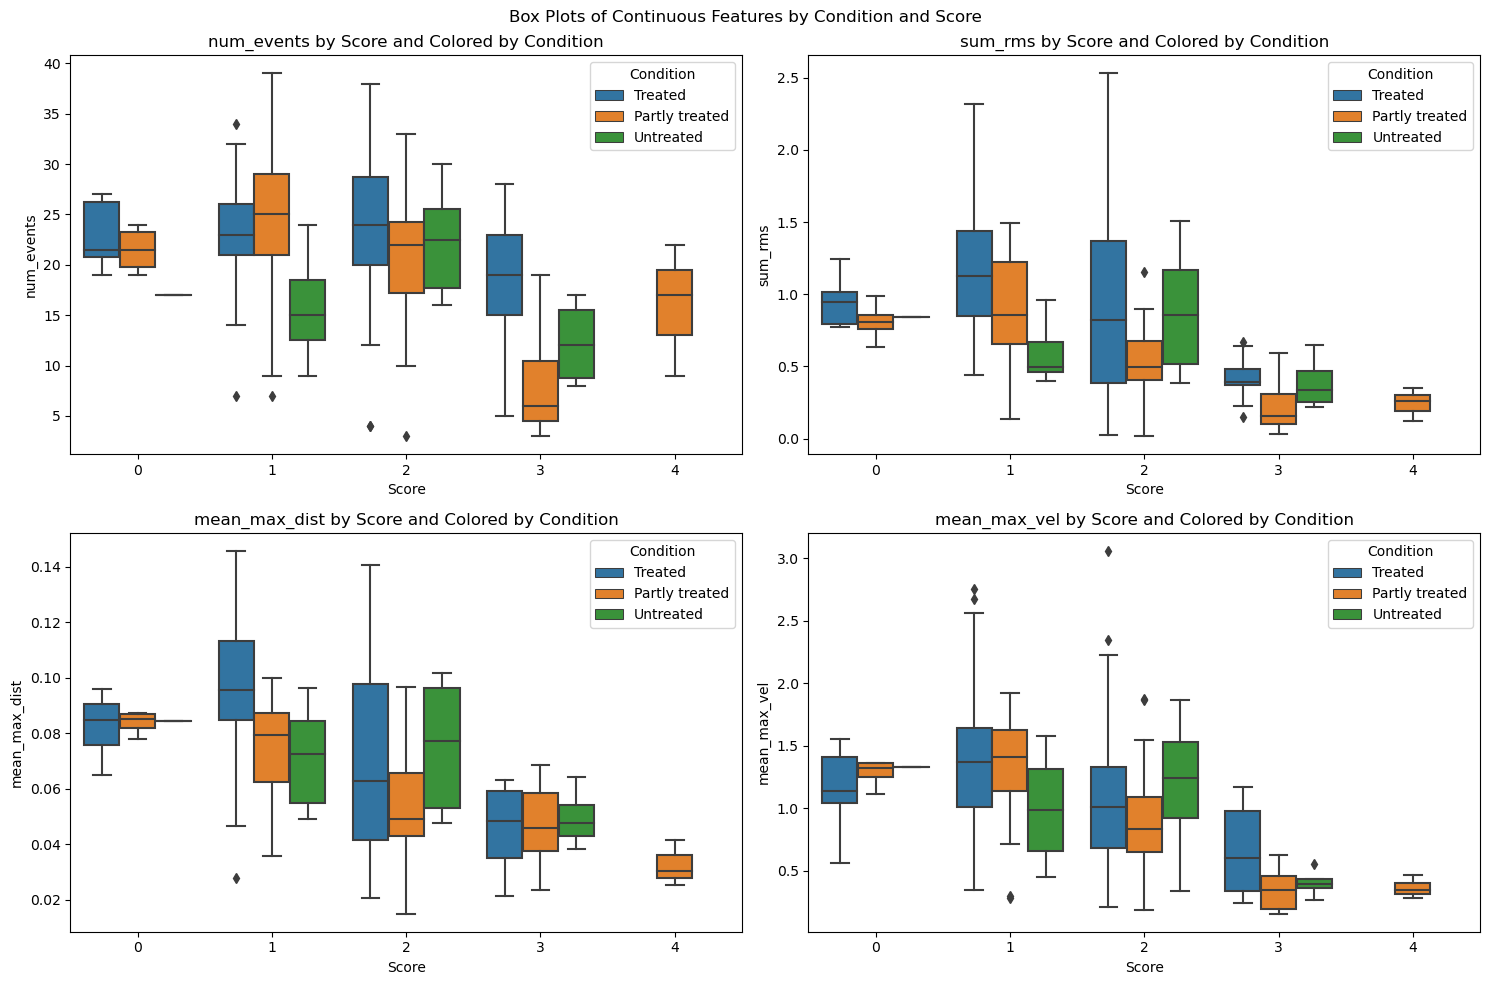

In [93]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Box Plots of Continuous Features by Condition and Score')

# Create box plots for each continuous feature
for i, feature in enumerate(continuous_features):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    sns.boxplot(data=df, x='score', y=feature, hue='condition', ax=ax)
    ax.set_title(f'{feature} by Score and Colored by Condition')
    ax.set_xlabel('Score')
    ax.set_ylabel(feature)
    ax.legend(title='Condition')

plt.tight_layout()
plt.show()

In [94]:
# Set the style of seaborn plots
sns.set(style="whitegrid")

# Example 1: Violin Plots
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='condition', y='num_events', hue='score', split=True)
plt.title('Violin Plot of num_events by Condition and Score')
plt.xlabel('Condition')
plt.ylabel('num_events')
plt.show()

# Example 2: Pairplot
sns.pairplot(df, hue='condition', diag_kind='kde')
plt.suptitle('Pair Plot of Continuous Features by Condition', y=1.02)
plt.show()

ValueError: There must be exactly two hue levels to use `split`.'

<Figure size 1000x600 with 0 Axes>

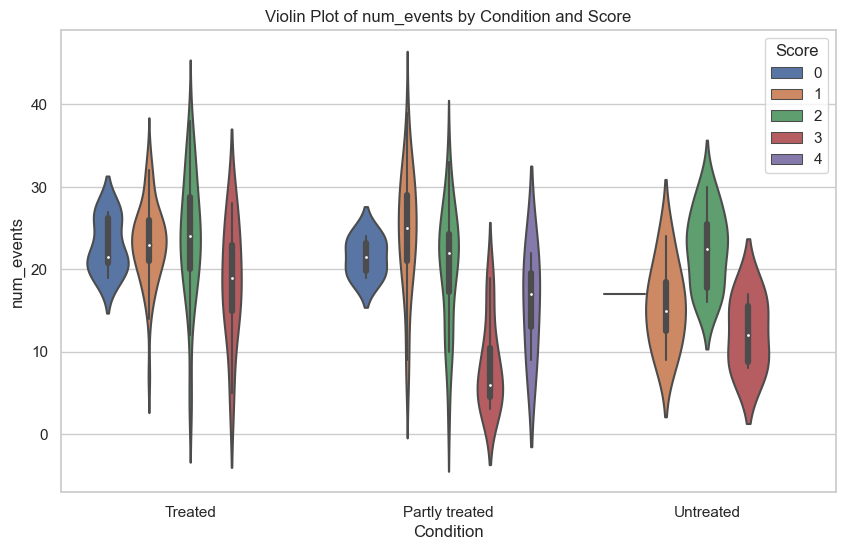

In [96]:
# Set the style of seaborn plots
sns.set(style="whitegrid")

# Example: Violin Plots
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='condition', y='num_events', hue='score')
plt.title('Violin Plot of num_events by Condition and Score')
plt.xlabel('Condition')
plt.ylabel('num_events')
plt.legend(title='Score')
plt.show()
